In [8]:
# Headers

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl

mpl.rcParams['axes.linewidth'] = 1.5 #set the value globally

import healpy as hp

from astropy.io import fits
from astropy.table import Table, Column

import treecorr

import os

from scipy.optimize import curve_fit

In [9]:
# can also be done just by reading the normal txt file instead of the fits file

NSIDE = 2048

print('Pixel scale [arcmins] = ', np.sqrt(hp.nside2pixarea(NSIDE, degrees = True)*3600))

Pixel scale [arcmins] =  1.7177432059087028


## Map visualisation

In [10]:
map_idx = 1
gaussian_healpix = False
map_type = 'gaussian'
logshift = 1.0

if (map_type == 'lognormal'):
    filepath = './simulations_output/lognormal_maps/logshift_'+str(logshift)+'/'
else:
    if (gaussian_healpix == True):
        filepath = './simulations_output/gaussian_maps_healpy/'
    else:
        filepath = './simulations_output/gaussian_maps/'

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


/home/anik/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


<Figure size 864x864 with 0 Axes>

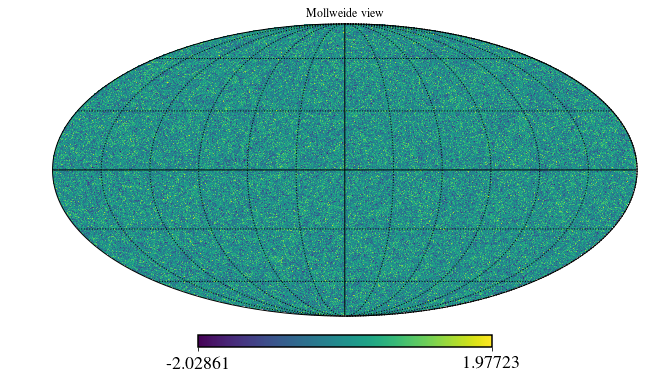

In [11]:
density_field = hp.fitsfunc.read_map(filepath+map_type+'_map_'+str(map_idx)+'.fits')
plt.figure(figsize=(12,12))
hp.mollview(density_field)#, min=-0.3, max=2.2)
hp.graticule()
#plt.savefig('./simulations_output/plot_output/density_field_'+map_type+'_map.pdf')

In [12]:
l_flask = np.loadtxt(filepath+'/recovCls_'+str(map_idx)+'.dat', usecols=[0])
recovCls_flask = np.loadtxt(filepath+'/recovCls_'+str(map_idx)+'.dat', usecols=[1])

if (gaussian_healpix == True):
    l_flask = np.arange(0,501)
    recovCls_flask = np.loadtxt(filepath+'/recovCls_'+str(map_idx)+'.dat', usecols=[0])
else :
    l_flask = np.loadtxt(filepath+'/recovCls_'+str(map_idx)+'.dat', usecols=[0])
    recovCls_flask = np.loadtxt(filepath+'/recovCls_'+str(map_idx)+'.dat', usecols=[1])

In [15]:
recov_alm_healpy = hp.sphtfunc.map2alm(density_field, lmax=2000)
recovCls_healpy = hp.sphtfunc.anafast(density_field, lmax=2000)

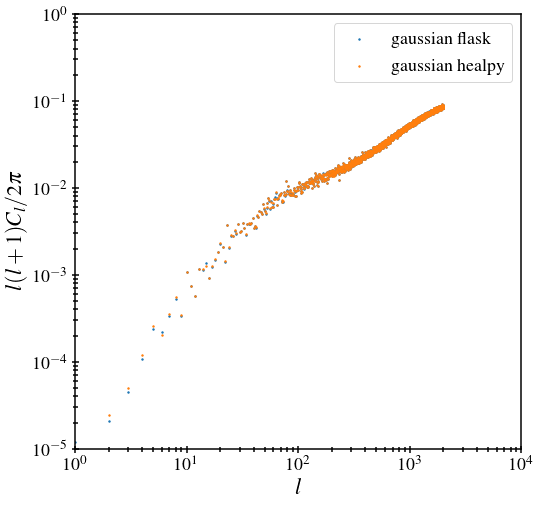

In [16]:
plt.figure(figsize=(8,8))
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=18)

plt.scatter(l_flask,l_flask*(l_flask+1)/(2*np.pi)*recovCls_flask, s=2, label=map_type+' flask')
plt.scatter(l_flask,l_flask*(l_flask+1)/(2*np.pi)*recovCls_healpy[1:], s=2, label=map_type+' healpy')

plt.yscale('log')
plt.xscale('log')
plt.xlim(1,1e4)
plt.ylim(1e-5,1)
plt.xlabel('$l$', fontsize=22)
plt.ylabel('$ l(l+1)C_l / 2\\pi$', fontsize=22)
plt.tick_params(labelsize=18)
plt.tick_params(which='major', length=7, width=1.5, direction='inout')
plt.tick_params(which='minor', length=5, width=1.5, direction='inout')
plt.legend(loc='best', fontsize=18)